# Metadata Plots

vnv_heap::vnv_heap::VNVHeap<vnv_heap::modules::allocator::linked_list::LinkedListAllocatorModule, vnv_heap::modules::nonresident_allocator::buddy::NonResidentBuddyAllocatorModule<19>, vnv_heap::modules::object_management::default::DefaultObjectManagementModule, spi_fram_storage::mb85rs4mt_fram_storage::MB85RS4MTFramStorageModule>
-> 120 bytes
vnv_heap::vnv_object::VNVObject<u8, vnv_heap::modules::allocator::linked_list::LinkedListAllocatorModule, vnv_heap::modules::nonresident_allocator::buddy::NonResidentBuddyAllocatorModule<19>, vnv_heap::modules::object_management::default::DefaultObjectManagementModule>
-> 8 bytes
vnv_heap::vnv_ref::VNVRef<u8, vnv_heap::modules::allocator::linked_list::LinkedListAllocatorModule, vnv_heap::modules::nonresident_allocator::buddy::NonResidentBuddyAllocatorModule<19>, vnv_heap::modules::object_management::default::DefaultObjectManagementModule>
-> 12 bytes
vnv_heap::vnv_mut_ref::VNVMutRef<u8, vnv_heap::modules::allocator::linked_list::LinkedListAllocatorModule, vnv_heap::modules::nonresident_allocator::buddy::NonResidentBuddyAllocatorModule<19>, vnv_heap::modules::object_management::default::DefaultObjectManagementModule>
-> 12 bytes
############# BUFFER SIZES #############
Buffer Cutoff
-> 56 bytes
Resident Object Metadata
-> 20 bytes
Resident Object Dirty Size
-> 17 bytes
Persist Access Point Size
-> 52 bytes


In [2]:
file_name = "../../vnv_heap_info/info.txt"

In [4]:
size_dict = [{
    "name": "heap",
    "match": "VNVHeap",
}, {
    "name": "object",
    "match": "VNVObject"
}, {
    "name": "ref",
    "match": "VNVRef"
}, {
    "name": "mut_ref",
    "match": "VNVMutRef"
}, {
    "name": "cutoff",
    "match": "Buffer Cutoff"
}, {
    "name": "resident_object_metadata",
    "match": "Resident Object Metadata"
}, {
    "name": "resident_object_dirty",
    "match": "Resident Object Dirty Size"
}, {
    "name": "access_point",
    "match": "Persist Access Point Size"
}]

In [26]:
#parse sizes

parsed_sizes = {}

next_key: None | str = None
with open(file_name) as file:
    for line in file.readlines():
        if next_key is not None:
            end_index = line.find("bytes") - 1
            parsed_sizes[next_key] = int(line[3:end_index])
            next_key = None
        else:
            for item in size_dict:
                if item["match"] in line:
                    next_key = item["name"]
                    break

parsed_sizes

{'heap': 120,
 'object': 8,
 'ref': 12,
 'mut_ref': 12,
 'cutoff': 56,
 'resident_object_metadata': 20,
 'resident_object_dirty': 17,
 'access_point': 52}

In [27]:
initial_overhead = parsed_sizes["heap"] + parsed_sizes["access_point"] + parsed_sizes["cutoff"]
resident_object_overhead = parsed_sizes["object"] + parsed_sizes["resident_object_metadata"]

# Final Plots

In [ ]:
import pandas as pd

step_start = 1024
step_end = 1024 * 8
step_size = 1024
step_cnt = int((step_end - step_start) / step_size + 1)

data = []
for i in range(step_cnt):
    curr = step_size * i + step_start
    data.append([curr, 100 * float(initial_overhead + resident_object_overhead) / float(curr + initial_overhead + resident_object_overhead)])

# Create the pandas DataFrame
overhead = pd.DataFrame(data, columns=['data_size', 'overhead'])

overhead

,data_size,overhead
0,1024,20.000000
1,2048,11.111111
2,3072,7.692308
3,4096,5.882353
4,5120,4.761905
5,6144,4.000000
6,7168,3.448276
7,8192,3.030303


Text(0.5, 1.0, 'Total RAM Overhead (because of metadata)')

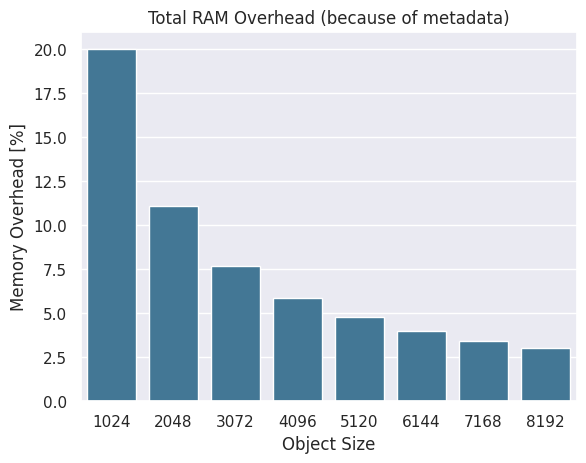

In [65]:
from util.plot import set_theme
from util.convert import scale_data, scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

set_theme(colors=1)

g = sns.barplot(
    overhead,
    x="data_size", y="overhead",
    #errorbar="sd", alpha=.8, height=6,
)
g.set_xlabel("Object Size")
g.set_ylabel("Memory Overhead [%]")
g.set_title("Total RAM Overhead (because of metadata)")



In [71]:
import pandas as pd

step_start = 256
step_end = 1024 * 2
step_size = 256
step_cnt = int((step_end - step_start) / step_size + 1)

data = []
for i in range(step_cnt):
    curr = step_size * i + step_start
    data.append([curr, 100 * float(resident_object_overhead) / float(curr + resident_object_overhead)])

# Create the pandas DataFrame
object_overhead = pd.DataFrame(data, columns=['data_size', 'overhead'])

object_overhead

,data_size,overhead
0,256,9.859155
1,512,5.185185
2,768,3.517588
3,1024,2.661597
4,1280,2.140673
5,1536,1.790281
6,1792,1.538462
7,2048,1.348748


Text(0.5, 1.0, 'Resident Object RAM Overhead (because of metadata)')

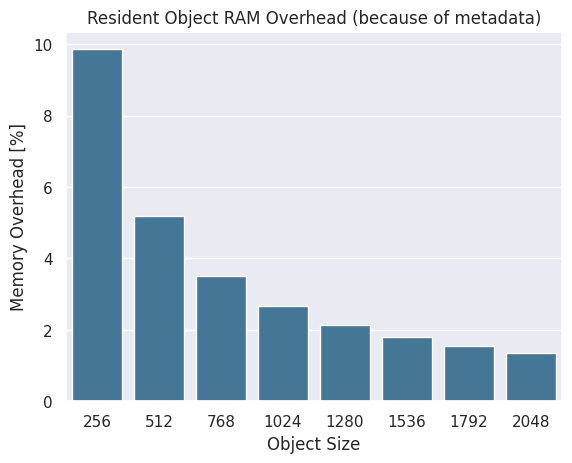

In [72]:
from util.plot import set_theme
from util.convert import scale_data, scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

set_theme(colors=1)

g = sns.barplot(
    object_overhead,
    x="data_size", y="overhead",
    #errorbar="sd", alpha=.8, height=6,
)
g.set_xlabel("Object Size")
g.set_ylabel("Memory Overhead [%]")
g.set_title("Resident Object RAM Overhead (because of metadata)")